In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Importing Modules

In [2]:
import pandas as pd
import threading
import time

### Data Ingestion

Threading cell will keep on executing until we explicity call stop_event.set(), so till the time we are covering other cells, the data will keep on updating

In [3]:
from gensim_utils import data_ingest

stop_event = threading.Event()
# Background function
def background_task():
    while not stop_event.is_set():
        data_ingest(minutes=1)
        time.sleep(60)

# Start in background thread
thread = threading.Thread(target=background_task)
# thread.daemon = True  # So it stops when the notebook shuts down
thread.start()

INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:17:48.306 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:17:48.213263 | Price: 103692
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:18:48.476 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:18:48.384708 | Price: 103691
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:19:48.657 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:19:48.577081 | Price: 103683
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:20:50.077 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:20:48.755505 | Price: 103678
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:21:50.218 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21

INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:48:55.152 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:48:55.050969 | Price: 103709
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:49:55.335 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:49:55.258393 | Price: 103705
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:50:55.594 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:50:55.427844 | Price: 103704
INFO:gensim_utils:Data Ingestion Module Completed
INFO:gensim_utils:Starting Data Ingestion Module
2025-05-16 21:51:55.765 | INFO     | gensim_utils:data_ingest:105 - Time: 2025-05-16 21:51:55.683747 | Price: 103708
INFO:gensim_utils:Data Ingestion Module Completed


In [58]:
# # Cell 2: Stop the thread
# stop_event.set()

### Data Reading

In [355]:
df = pd.read_csv("data.csv")
print(df.shape)
df.head(3)

(39, 4)


,time,price,datetime,date
0,20:55:00.205453,103657,2025-05-16 20:55:00.205453,2025-05-16
1,20:56:00.356717,103655,2025-05-16 20:56:00.356717,2025-05-16
2,20:57:00.544954,103655,2025-05-16 20:57:00.544954,2025-05-16


### Data Transformation & Segmentation

In [356]:
from gensim_utils import data_transform, segmentation

# Feature engineering and creating windows for data segmentation
df = data_transform(df, window=5)
df.head()

# Segmenting data into documents based on window size
documents = segmentation(df)
documents = documents[:-1]
documents[:5]

INFO:gensim_utils:Segmented data with window size of: 5
INFO:gensim_utils:Segmented data into documents


[['stable', 'stable', 'stable', 'medium_down', 'large_up'],
 ['stable', 'stable', 'stable', 'stable', 'medium_up'],
 ['stable', 'stable', 'stable', 'stable', 'stable'],
 ['stable', 'stable', 'stable', 'stable', 'stable'],
 ['stable', 'stable', 'stable', 'stable', 'stable']]

### Vectorization

In [357]:
from gensim_utils import word2vec, fasttext, doc_tagger, do2vec

# Creating a Word2Vec Model
w2v_model = word2vec(documents)

# Creating a FastText Vector Model
ft_model = fasttext(documents)

# Creating a Doc2Vec Model
tagged_docs = doc_tagger(documents)
d2v_model = do2vec(tagged_docs)

INFO:gensim_utils:Vectorization completed using Word2Vec Model
INFO:gensim_utils:Vectorization completed using FastText Model
INFO:gensim_utils:Document Tagging completed
INFO:gensim_utils:Document Vectorization completed using Doc2Vec Model


### Topic Modeling

In [358]:
from gensim_utils import corpus_creation, lda_modeling, lsi_modeling

# Creating dictionary and corpus for our topic models
dictionary, corpus = corpus_creation(documents)

# Creating LDA Model with 2 topics
lda_model = lda_modeling(dictionary, corpus, num_topics=2)

# Creating LSI Model with 2 topics
lsi_model = lsi_modeling(dictionary, corpus, num_topics=2)

INFO:gensim_utils:Dictionary and Corpus created for Topic Modeling


LDA Modeling done with the following topics:
(0, '0.874*"stable" + 0.053*"medium_down" + 0.053*"large_up" + 0.019*"medium_up"')
(1, '0.689*"stable" + 0.219*"medium_up" + 0.046*"large_up" + 0.046*"medium_down"')
LSI Modeling done with the following topics:
(0, '0.998*"stable" + 0.057*"medium_up" + 0.021*"medium_down" + 0.021*"large_up"')
(1, '0.625*"medium_down" + 0.625*"large_up" + -0.469*"medium_up" + -0.000*"stable"')


### Analysis & Report

In [359]:
from gensim_utils import sub_dataframe

# Pull out a specific row (e.g., for the 0th time window)
sub_dataframe(df, 0)

time                      20:55:00.205453
price                              103657
datetime       2025-05-16 20:55:00.205453
date                           2025-05-16
perc_change                           0.0
movement                           stable
window                                  0
Name: 0, dtype: object

In [360]:
from gensim_utils import vector_model_topic_similarity

# Word2Vec
similarity_df_w2v = vector_model_topic_similarity(w2v_model)
print("Similarity matrix based on Word2Vec Model")
# print(vector_model_topic_similarity.__doc__)
print(similarity_df_w2v,'\n')

# FastText
similarity_df_fasttext = vector_model_topic_similarity(ft_model)
print("Similarity matrix based on FastText Model")
# print(vector_model_topic_similarity.__doc__)
print(similarity_df_fasttext,'\n')

# Doc2Vec
similarity_df_d2v = vector_model_topic_similarity(d2v_model)
print("Similarity matrix based on Doc2Vec Model")
# print(vector_model_topic_similarity.__doc__)
print(similarity_df_d2v,'\n')


Similarity matrix based on Word2Vec Model
               stable  medium_up  large_up  medium_down
stable       1.000000   0.042373  0.126701    -0.014475
medium_up    0.042373   1.000000  0.011072    -0.174248
large_up     0.126701   0.011072  1.000000    -0.155156
medium_down -0.014475  -0.174248 -0.155156     1.000000 

Similarity matrix based on FastText Model
               stable  medium_up  large_up  medium_down
stable       1.000000  -0.143968  0.038013    -0.036975
medium_up   -0.143968   1.000000  0.039126     0.487651
large_up     0.038013   0.039126  1.000000    -0.278378
medium_down -0.036975   0.487651 -0.278378     1.000000 

Similarity matrix based on Doc2Vec Model
               stable  medium_up  large_up  medium_down
stable       1.000000   0.042373  0.126701    -0.014475
medium_up    0.042373   1.000000  0.011072    -0.174248
large_up     0.126701   0.011072  1.000000    -0.155156
medium_down -0.014475  -0.174248 -0.155156     1.000000 



In [361]:
from gensim_utils import vecmodel_window_similarity

# Selecting two time windows (documents)
doc1 = documents[2]
doc2 = documents[-1]

# print(vecmodel_window_similarity.__doc__)
print("Doc1:", doc1)
print("Doc2:", doc2)

# Similarity based on Word2Vec Model
print("Similarity based on Word2Vec Model")
vecmodel_window_similarity(w2v_model, doc1, doc2)

# Similarity based on FastText Model
print("Similarity based on FastText Model")
vecmodel_window_similarity(ft_model, doc1, doc2)

# Similarity based on Doc2Vec Model
print("Similarity based on Doc2Vec Model")
vecmodel_window_similarity(d2v_model, doc1, doc2)


Doc1: ['stable', 'stable', 'stable', 'stable', 'stable']
Doc2: ['stable', 'stable', 'medium_up', 'stable', 'stable']
Similarity based on Word2Vec Model
Similarity: 0.9774
Similarity based on FastText Model
Similarity: 0.9591
Similarity based on Doc2Vec Model
Similarity: 0.9774


In [362]:
from gensim_utils import similar_d2v_time

# Use the most recent document
doc = documents[-1]

# print(similar_d2v_time.__doc__)
similar_d2v_time(df, d2v_model, doc)

Top 5 similar timeframes
Timeframe: 2025-05-16, 21:33:52.271321 To 2025-05-16, 21:37:53.190065 Similarity: 0.1568281203508377
Timeframe: 2025-05-16, 21:28:51.427309 To 2025-05-16, 21:32:52.136420 Similarity: 0.13679470121860504
Timeframe: 2025-05-16, 20:55:00.205453 To 2025-05-16, 21:17:48.213263 Similarity: 0.11231875419616699
Timeframe: 2025-05-16, 21:38:53.345837 To 2025-05-16, 21:42:53.944784 Similarity: 0.030259795486927032
Timeframe: 2025-05-16, 21:18:48.384708 To 2025-05-16, 21:22:50.254317 Similarity: -0.04824787750840187


In [363]:
from gensim_utils import similar_w2v_time, sub_dataframe

# Document for which we want similar windows
index = -1
doc = documents[index]

# print(similar_w2v_time.__doc__)

print("\nTimestamp for which we are finding similar windows")
print(sub_dataframe(df, index))

print("\nSimilar windows based on Word2Vec Model")
similar_w2v_time(df, w2v_model, documents, doc, topn=5)

print("\nSimilar windows based on FastText Model")
similar_w2v_time(df, ft_model, documents, doc, topn=5)



Timestamp for which we are finding similar windows
time                      21:51:55.683747
price                              103708
datetime       2025-05-16 21:51:55.683747
date                           2025-05-16
perc_change                      0.003857
movement                           stable
window                                  7
Name: 38, dtype: object

Similar windows based on Word2Vec Model
Top 5 similar timeframes:
Timeframe: 2025-05-16, 21:43:54.115227 To 2025-05-16, 21:47:54.897917 Similarity: 1.0000
Timeframe: 2025-05-16, 21:18:48.384708 To 2025-05-16, 21:22:50.254317 Similarity: 1.0000
Timeframe: 2025-05-16, 21:38:53.345837 To 2025-05-16, 21:42:53.944784 Similarity: 0.9774
Timeframe: 2025-05-16, 21:33:52.271321 To 2025-05-16, 21:37:53.190065 Similarity: 0.9774
Timeframe: 2025-05-16, 21:28:51.427309 To 2025-05-16, 21:32:52.136420 Similarity: 0.9774

Similar windows based on FastText Model
Top 5 similar timeframes:
Timeframe: 2025-05-16, 21:18:48.384708 To 2025-05-1

In [364]:
from gensim_utils import d2v_cosine_sim

# print(d2v_cosine_sim.__doc__)
d2v_cosine_sim(d2v_model, tagged_docs)

Top 10 similar pairs
Windows 0 & 1 --> Similarity: 0.2743
Windows 0 & 5 --> Similarity: 0.2683
Windows 1 & 5 --> Similarity: 0.2422
Windows 1 & 3 --> Similarity: 0.1999
Windows 2 & 6 --> Similarity: 0.1667
Windows 0 & 2 --> Similarity: 0.1228
Windows 3 & 6 --> Similarity: 0.0491
Windows 5 & 6 --> Similarity: 0.0425
Windows 2 & 5 --> Similarity: -0.0176
Windows 4 & 5 --> Similarity: -0.0376


Top 20 most similar time windows:
Windows 1 & 6 --> Similarity: 1.0000
Windows 2 & 3 --> Similarity: 1.0000
Windows 2 & 4 --> Similarity: 1.0000
Windows 2 & 5 --> Similarity: 1.0000
Windows 3 & 4 --> Similarity: 1.0000
Windows 3 & 5 --> Similarity: 1.0000
Windows 4 & 5 --> Similarity: 1.0000
Windows 1 & 2 --> Similarity: 0.9774
Windows 1 & 3 --> Similarity: 0.9774
Windows 1 & 4 --> Similarity: 0.9774


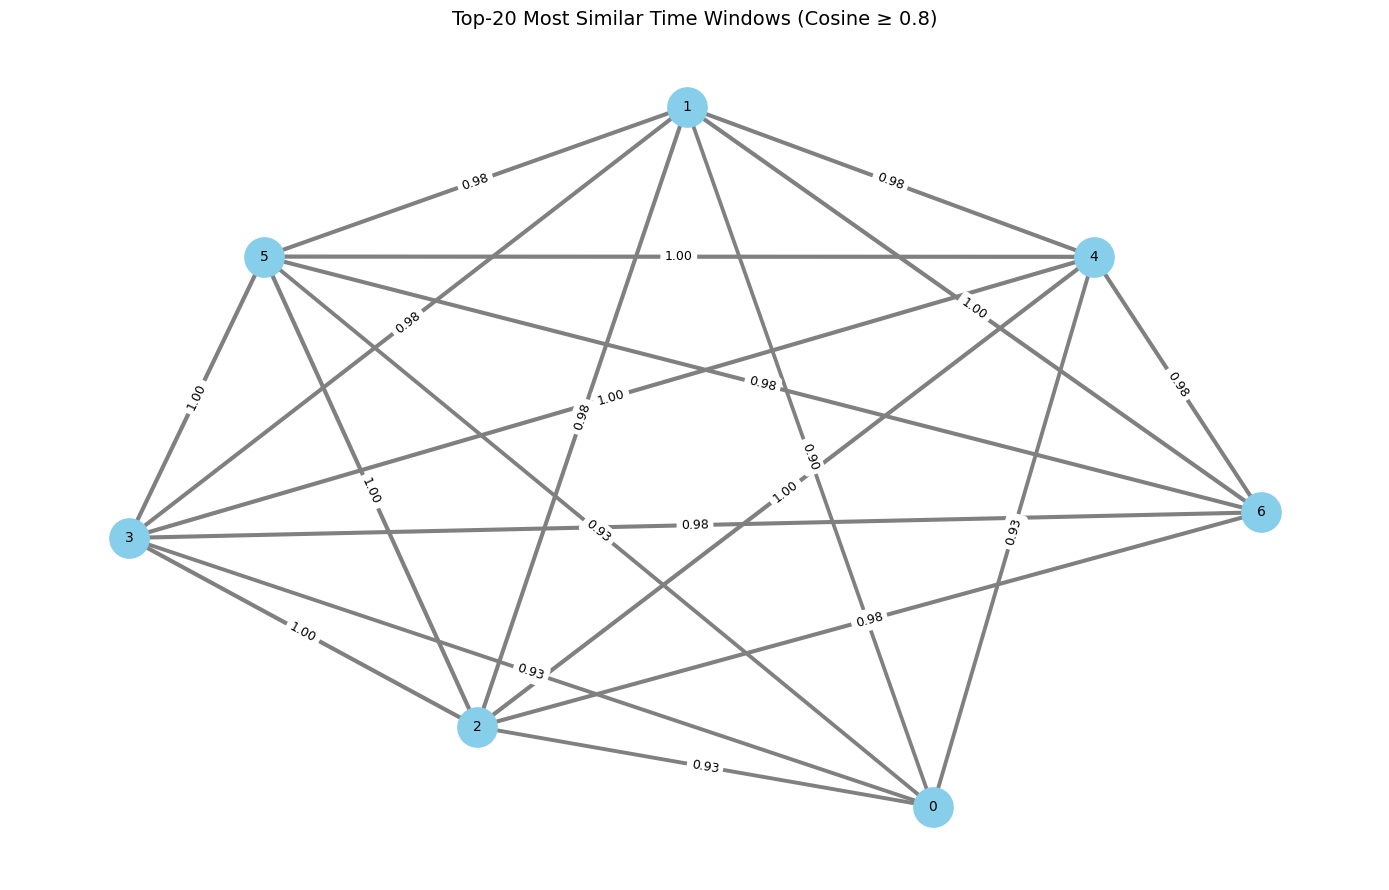

Investment Confidence Score (Last 5 windows): 98.19/100


In [365]:
from gensim_utils import word2v_cosine_sim

# Visualize similarity graph and calculate confidence - Word2Vec
word2v_cosine_sim(w2v_model, documents, top_k=20, threshold=0.8)

Top 20 most similar time windows:
Windows 1 & 6 --> Similarity: 1.0000
Windows 2 & 3 --> Similarity: 1.0000
Windows 2 & 4 --> Similarity: 1.0000
Windows 2 & 5 --> Similarity: 1.0000
Windows 3 & 4 --> Similarity: 1.0000
Windows 3 & 5 --> Similarity: 1.0000
Windows 4 & 5 --> Similarity: 1.0000
Windows 1 & 2 --> Similarity: 0.9591
Windows 1 & 3 --> Similarity: 0.9591
Windows 1 & 4 --> Similarity: 0.9591


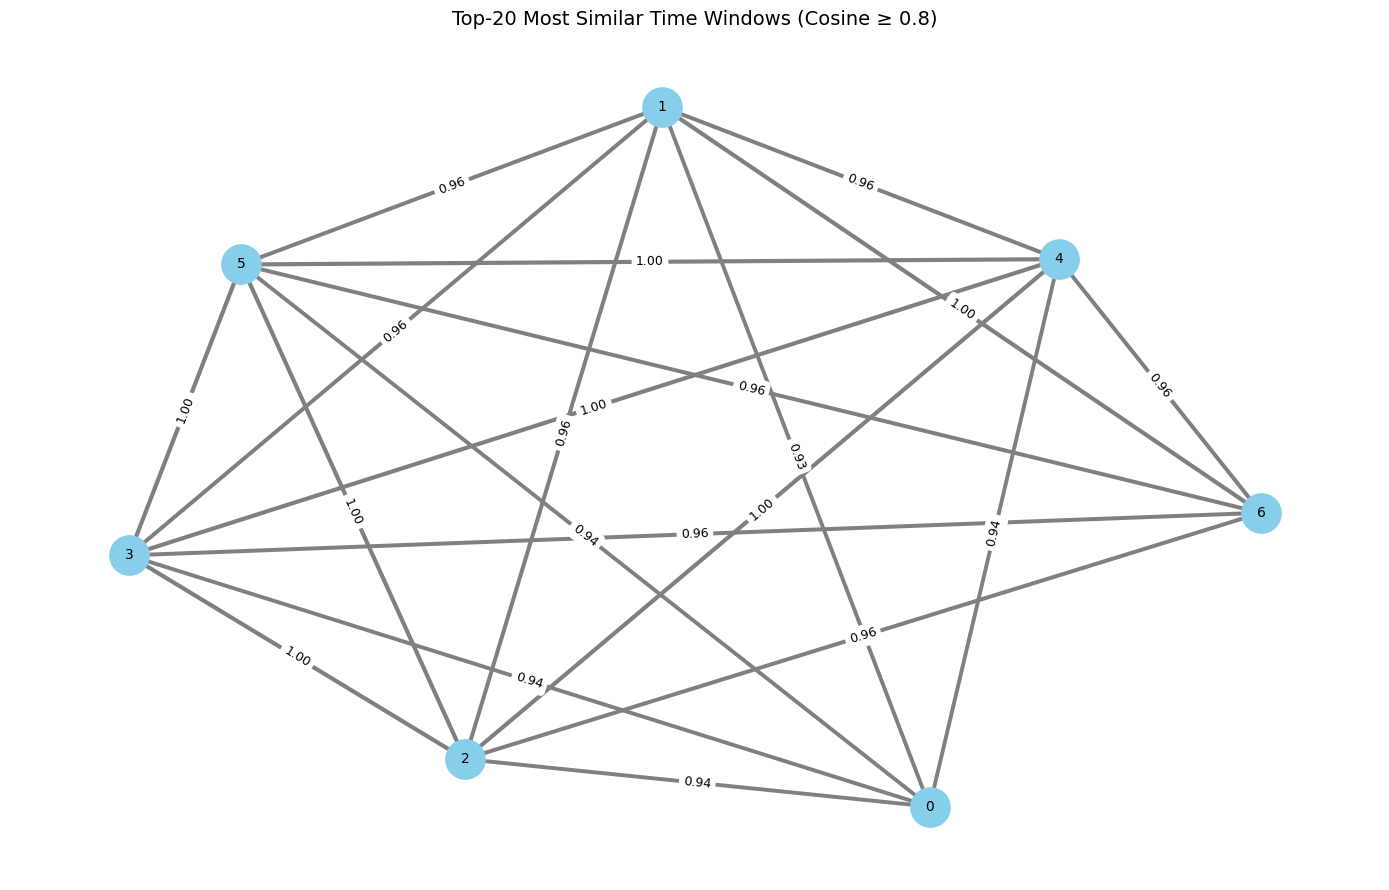

Investment Confidence Score (Last 5 windows): 96.73/100


In [366]:
# Visualize similarity graph and calculate confidence - FastText
word2v_cosine_sim(ft_model,documents, top_k=20, threshold=0.8)

In [367]:
from gensim_utils import topic_model_cos_sim, combine_topic_signals

lda_result = topic_model_cos_sim(lda_model, corpus)  # returns (trend, confidence)
lsi_result = topic_model_cos_sim(lsi_model, corpus)  # returns (trend, confidence)

combine_topic_signals(lda_result, lsi_result)

LDA --> Trend: Bullish | Confidence: 58.29
LSI --> Trend: Bearish | Confidence: 99.47
Weighted Recommendation: BEARISH (based on LSI, stronger confidence).


Topic 0: 0.874*"stable" + 0.053*"medium_down" + 0.053*"large_up" + 0.019*"medium_up"
Topic 1: 0.689*"stable" + 0.219*"medium_up" + 0.046*"large_up" + 0.046*"medium_down"


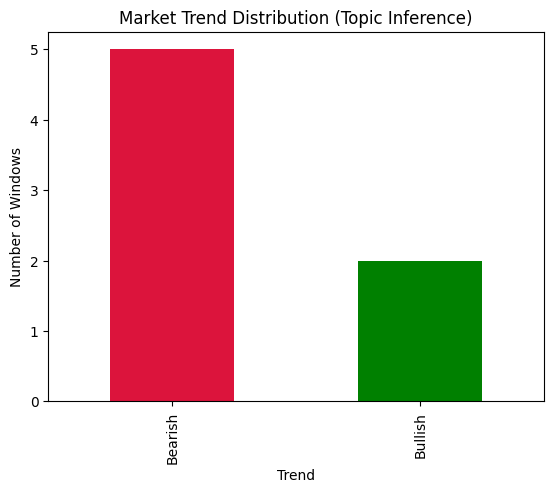

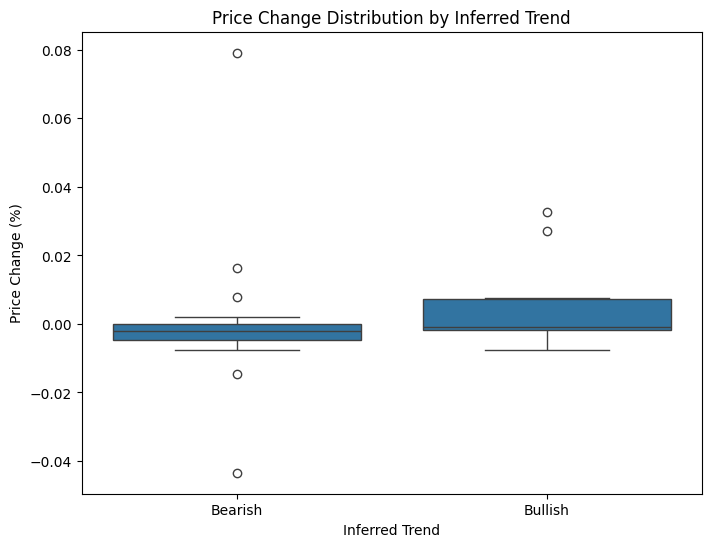

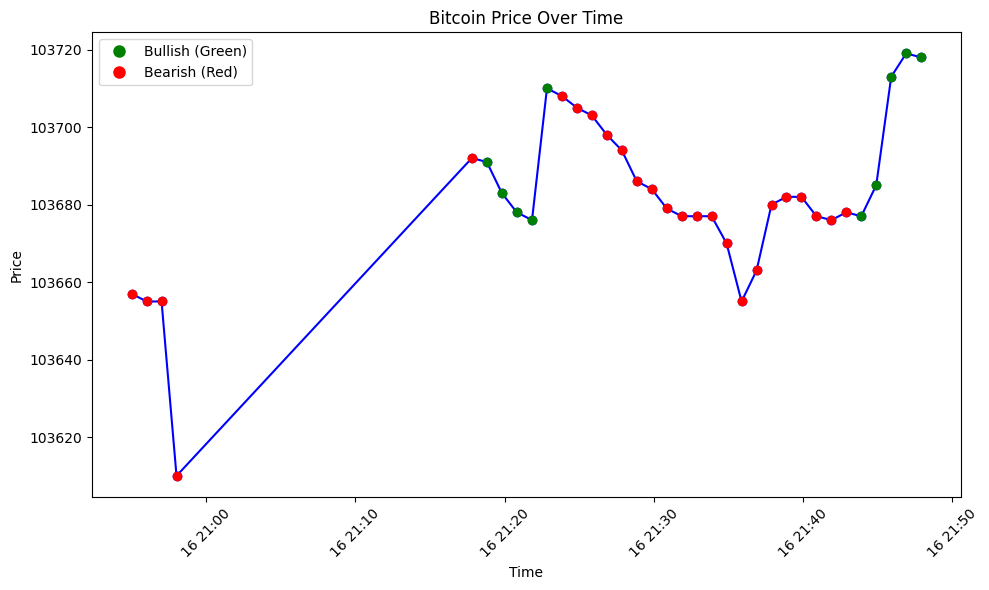

In [368]:
from gensim_utils import time_analysis

df_temp = time_analysis(lda_model, corpus, df)